In [1]:
import pandas as pd
import nltk as nk
import numpy as np
from sklearn.feature_extraction import stop_words
from collections import Counter
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
%matplotlib inline
import random

In [2]:
data1 = pd.read_csv("ride_data1.csv")
data2 = pd.read_csv("ride_data2.csv")

In [3]:
data = pd.concat([data1,data2])

In [4]:
data.head()

,ride_review,ride_rating,sentiment
0,I had just completed running the New York Mara...,1.0,0
1,My appointment time for auto repairs required ...,1.0,0
2,Whether I am using Uber for a ride service or ...,1.0,0
3,Why is it so hard for you to understand that i...,1.0,0
4,"I was in South Beach, FL. I was staying at a m...",1.0,0


In [5]:
c = Counter()
c.update(data['sentiment'])
print (c)

Counter({0: 1111, 1: 233})


In [6]:
data1 = data.copy(deep=True)
rationales = pd.read_csv("new_rationales.csv")
rationales['sentiment'] = data['sentiment'].values[0:len(rationales)]

In [7]:
rationales.head()

,ID,Rationales,sentiment
0,0,went wrong. played dumb. jerk.charge me partia...,0
1,1,unsuccessful. treated rudely. great disrespect.,0
2,2,terrible. forgotten. refund for the missing it...,0
3,3,problems.,0
4,4,ridiculous. charged me.,0


In [8]:
'''
rationales_1 = pd.read_csv("rationales.csv")
rationales_2 = pd.read_csv("rationales_1.csv")
rationales_3 = pd.read_csv("rationales_2.csv")
rationales_4 = pd.read_csv("rationales_3.csv")
rationales_5 = pd.read_csv("rationales_4.csv")
'''

'\nrationales_1 = pd.read_csv("rationales.csv")\nrationales_2 = pd.read_csv("rationales_1.csv")\nrationales_3 = pd.read_csv("rationales_2.csv")\nrationales_4 = pd.read_csv("rationales_3.csv")\nrationales_5 = pd.read_csv("rationales_4.csv")\n'

In [9]:
'''
rationales = pd.concat([rationales_1,rationales_2, rationales_3, rationales_4,rationales_5])
rationales.sort("ID",inplace=True)
'''

'\nrationales = pd.concat([rationales_1,rationales_2, rationales_3, rationales_4,rationales_5])\nrationales.sort("ID",inplace=True)\n'

In [10]:
'''
j=204
rationales = {}
for i,r in data.iterrows():
    if(j==208):
        break
    if(i==j):
        print (i)
        print (r['ride_review'])
        print ("\n")
        print (r['sentiment'])
        print ("\n")
        rationales[i] = input("rationales")
        print ("\n\n")
        j+=1
'''

'\nj=204\nrationales = {}\nfor i,r in data.iterrows():\n    if(j==208):\n        break\n    if(i==j):\n        print (i)\n        print (r[\'ride_review\'])\n        print ("\n")\n        print (r[\'sentiment\'])\n        print ("\n")\n        rationales[i] = input("rationales")\n        print ("\n\n")\n        j+=1\n'

In [11]:
def provide_rationales(data):
    rationales = {}
    for i,r in data.iterrows():
            print (i)
            print (r['ride_review'])
            print ("\n")
            print (r['sentiment'])
            print ("\n")
            rationales[i] = input("rationales")
            print ("\n\n")
    return rationales

In [12]:
'''
rationales[175] = "Shame"
rationales[201] = rationales[201] + "upset and annoyed. negative feedback. unacceptable.unhappy."
'''

'\nrationales[175] = "Shame"\nrationales[201] = rationales[201] + "upset and annoyed. negative feedback. unacceptable.unhappy."\n'

In [13]:
'''
rs = []
for i,r in rationales.items():
    rs.append((i,r))
ra_d = pd.DataFrame(rs,columns=["ID","Rationales"])
ra_d.to_csv("new_rationales.csv",index=False)
rd = pd.read_csv("new_rationales.csv")
'''

'\nrs = []\nfor i,r in rationales.items():\n    rs.append((i,r))\nra_d = pd.DataFrame(rs,columns=["ID","Rationales"])\nra_d.to_csv("new_rationales.csv",index=False)\nrd = pd.read_csv("new_rationales.csv")\n'

In [14]:
stopwords = stopwords.words('english')
with open("stopwords_stanford") as f:
    stanford_sw = f.readlines()
stanford_sw = [x.strip() for x in stanford_sw]
sw = list(set(stopwords + stanford_sw + list(stop_words.ENGLISH_STOP_WORDS)))

In [15]:
def data_preprocessing(text):
    sb = SnowballStemmer("english")
    for i in range(0,len(text['Rationales'])):
        #print (type(text['Rationales'].iloc[i]))
        try:
            if(not pd.isnull(text['Rationales']).iloc[i]):
                #print (text['Rationales'].iloc[i])
                tokens = word_tokenize(text['Rationales'].iloc[i])
                tokens = [x.lower() for x in tokens if x.lower() not in sw]
                tokens = list(filter(lambda x:x.isalpha(),tokens))
                stem_tokens = [sb.stem(x) for x in tokens]
                c = Counter()
                c.update(stem_tokens)
                d = dict(c)
                seen = set()
                result = []
                for item in tokens:
                    if sb.stem(item) not in seen:
                        seen.add(sb.stem(item))
                        result.append(item)
                review = ' '.join(x for x in result)
                text['Rationales'].iloc[i] = review
            else:
                text['Rationales'].iloc[i] = " "
                #print (type(text['Rationales'].iloc[i]))
                #print (np.isnan(text['Rationales'].iloc[i]))
        except:
            print (text['Rationales'].iloc[i])
    return text

In [16]:
text = data_preprocessing(rationales)

/Users/purvank/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
def ngrams(text, n):
    return (text[i : i+n] for i in range(len(text)-n+1))

In [18]:
n_gs = []
for i in text['Rationales']:
    n_gs +=  [[x for ngram in ngrams(word_tokenize(i),1) for x in ngram]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),2)]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),3)]]

In [19]:
data_ngs = []
for i in data['ride_review']:
    data_ngs +=  [[x for ngram in ngrams(word_tokenize(i),1) for x in ngram]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),2)]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),3)]]

In [20]:
tf_idf = pd.read_csv("data2.csv")
tf_idf_1 = tf_idf.copy(deep=True)

In [21]:
positive_class_rationales = []
negative_class_rationales = []
for i in range(0,len(n_gs)):
    rationales = list(set(n_gs[i]).intersection(tf_idf.columns))
    non_rationales = list(set(data.columns) ^ (set(n_gs[i]).intersection(tf_idf.columns)))
    if(data['sentiment'].iloc[i]==1):
        positive_class_rationales += [x for x in rationales]
    else:
        negative_class_rationales += [x for x in rationales]

In [22]:
positive_class_rationales = list(set(positive_class_rationales))
negative_class_rationales = list(set(negative_class_rationales))

In [23]:
def rationales(d,n):
    data = d.head(n=n)
    t = []
    for i,r in data.iterrows():
        rationales = list(set(n_gs[i]).intersection(data.columns))
        non_rationales = list(set(data.columns) ^ (set(n_gs[i]).intersection(data.columns)))
        t.append([1 if x in rationales else 0.01 for x in data.columns.difference(['sentiment'])]+[data['sentiment'].iloc[i]])
    r_values = pd.DataFrame(t,columns=data.columns)
    m = data[data.columns.difference(['sentiment'])].multiply(r_values[r_values.columns.difference(['sentiment'])],axis='columns')
    m['sentiment'] = data['sentiment']
    return m

In [24]:
def active_learning_rationales(index):
    #print (df1.head())
    #print (df1.columns)
    #print (type(df1))
    rats = {}
    df1 = tf_idf_1.loc[index]
    for i in index:
        print (data['ride_review'].iloc[i])
        print ("\n")
        print (data['sentiment'].iloc[i])
        print ("\n")
        change = input("Do you want to change the label for this instance?: ")
        if(change=='y'):
            new_label = input("Provide a new label: ")
            df1['sentiment'].loc[i] = int(new_label)
        print ("\n")
        rats[i] = input("rationales: ")
        print ("\n\n")
    df = pd.DataFrame.from_dict(rats,orient='index')
    df.head()
    df.columns = ["Rationales"]
    rational_text = data_preprocessing(df)
    n_gs_1 = {}
    j = 0
    for i in rational_text['Rationales']:
        n_gs_1[index[j]] =  [x for ngram in ngrams(word_tokenize(i),1) for x in ngram]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),2)]+[' '.join(ngram) for ngram in ngrams(word_tokenize(i),3)]
        j+=1
    t1 = []
    for i,r in df1.iterrows():
        rationales1 = list(set(n_gs_1[i]).intersection(df1.columns))
        non_rationales1 = list(set(df1.columns) ^ (set(rationales1)))
        t1.append([1 if x in rationales1 else 0.01 for x in df1.columns.difference(['sentiment'])]+[df1['sentiment'].loc[i]])
    r_values1 = pd.DataFrame(t1,columns=df1.columns,index=df1.index)
    m1 = df1[df1.columns.difference(['sentiment'])].multiply(r_values1[r_values1.columns.difference(['sentiment'])],axis='columns')
    m1['sentiment'] = df1['sentiment']
    return m1,rats

In [25]:
def active_learning_UNC(d,t,index):
    print ("-----------------"+"Active Learning using UNC method"+"---------------------------\n")
    new_data1,rats = active_learning_rationales(index[:5])
    return new_data1,rats

In [26]:
def active_learning_UNC_PC(d,t,index):
    print ("-------------------"+"Active learning using UNC-PC method"+"-----------------------\n")
    positive_negative = []
    u_i = []
    for i in index:
        #positive_negative.append([tuple(set(data_ngs[i]).intersection(positive_class_rationales)),tuple(set(data_ngs[i]).intersection(negative_class_rationales))])
        no_postivie = len(set(data_ngs[i]).intersection(positive_class_rationales))
        no_negative = len(set(data_ngs[i]).intersection(negative_class_rationales))
        if(no_postivie>1 and no_negative>1):
            u_i.append(np.abs(no_postivie-no_negative))
    uncertain_instances = list(np.argsort(u_i)[:5][::1])
    new_data,rats1 = active_learning_rationales(uncertain_instances)
    return new_data,rats1

In [36]:
def model_fitting(train,test,r=False):
    lr = LogisticRegression(class_weight='balanced',random_state=367)
    lr1 = LogisticRegression(class_weight='balanced',random_state=367,penalty='l1')
    lr.fit(train[train.columns.difference(['sentiment'])],train['sentiment'])
    lr1.fit(train[train.columns.difference(['sentiment'])],train['sentiment'])
    pred = lr.predict_proba(test[test.columns.difference(['sentiment'])])
    pred_ = lr1.predict_proba(test[test.columns.difference(['sentiment'])])
    auc1 = 0
    auc2 = 0 
    l3 = []
    for i in range(0,len(train.columns)-1):
        l3.append((train.columns[i],np.abs(lr.coef_[0][i])))
    w = sorted(l3,key=lambda x:x[1],reverse=True)[:10]
    l4 = []
    for i in range(0,len(train.columns)-1):
        l4.append((train.columns[i],np.abs(lr1.coef_[0][i])))
    w1 = sorted(l4,key=lambda x:x[1],reverse=True)[:10]
    if(r==True):
        print ("----------------"+"Active Learning"+"-----------------------\n")
        test1 = test.copy(deep=True)
        test2 = test.copy(deep=True)
        UNC_uncertain = list(np.argsort([abs(x[1]-0.5) for x in enumerate(pred[:,0])])[:5])
        UNC_PC_uncertain = list(np.argsort([abs(x[1]-0.5) for x in enumerate(pred[:,0])])[:20])
        we = test.iloc[UNC_PC_uncertain]
        we1 = test.iloc[UNC_uncertain]
        t,rats = active_learning_UNC(data.iloc[list(we1.index)],test.loc[list(we1.index)],we1.index)
        t1,rats1 = active_learning_UNC_PC(data.iloc[list(we.index)],test.loc[list(we.index)],we.index)
        for i,r in t1.iterrows():
            test1.loc[i] = t1.loc[i] 
        for i,r in t.iterrows():
            test2.loc[i] = t.loc[i]
        #print (list(we1.index))
        pred1 = lr.predict_proba(test1[test1.columns.difference(['sentiment'])])
        pred2 = lr.predict_proba(test2[test2.columns.difference(['sentiment'])])
        pred3 = lr1.predict_proba(test1[test1.columns.difference(['sentiment'])])
        pred4 = lr1.predict_proba(test2[test2.columns.difference(['sentiment'])])
        auc = roc_auc_score(test['sentiment'],pred[:,1])
        auc1 = roc_auc_score(test1['sentiment'],pred1[:,1])
        auc2 = roc_auc_score(test2['sentiment'],pred2[:,1])
        auc3 = roc_auc_score(test['sentiment'],pred_[:,1])
        auc4 = roc_auc_score(test1['sentiment'],pred3[:,1])
        auc5 = roc_auc_score(test2['sentiment'],pred4[:,1])
        return auc,auc1,auc2,auc3,auc4,auc5,rats,rats1
    auc = roc_auc_score(test['sentiment'],pred[:,1])
    auc_ = roc_auc_score(test['sentiment'],pred_[:,1])
    return auc,auc_,w,w1

In [39]:
def results(r=False):
    l = [50,100,150,200,250,300]
    lwr = []
    lwo_r = []
    lwr_l1 = []
    lwo_r_l1 = []
    lwr_UNC_PC = []
    lwr_UNC_PC_l1 = []
    lwr_UNC = []
    lwr_UNC_l1 = []
    rats_UNC_PC = []
    rats_UNC = []
    for i in range(0,len(l)):
        train_rational_data = rationales(tf_idf,l[i])
        train_normal_data = tf_idf.head(n=l[i])
        test_rational_data = tf_idf[l[i]:len(tf_idf)]
        test_normal_data = tf_idf[l[i]:len(tf_idf)]
        print ("----------"+"%d instances"%l[i]+"----------------\n")
        if(r==True):
            auc,auc1,auc2,auc3,auc4,auc5,rats,rats_pc = model_fitting(train_rational_data,test_rational_data,r)
            auc6,auc7 = model_fitting(train_normal_data,test_normal_data)
            print ("-------------Logistic Regression with l2 penalty----------------------")
            print ("AUC of Learning with rationales for %d instances: %f"%(l[i],auc))
            print ("AUC of. Learning without rationals for %d instances: %f"%(l[i],auc6))
            print ("AUC of Active Learning with UNC_PC for %d instances: %f"%(l[i],auc1))
            print ("AUC of Active Learning with UNC for %d instances: %f"%(l[i],auc2))
            print ("-------------Logistic Regression with l1 penalty-----------------------")
            print ("AUC of Learning with rationales for %d instances: %f"%(l[i],auc3))
            print ("AUC of. Learning without rationals for %d instances: %f"%(l[i],auc7))
            print ("AUC of Active Learning with UNC_PC for %d instances: %f"%(l[i],auc4))
            print ("AUC of Active Learning with UNC for %d instances: %f"%(l[i],auc5))
            lwr.append(auc)
            lwo_r.append(auc6)
            lwr_l1.append(auc3)
            lwo_r_l1.append(auc7)
            lwr_UNC_PC.append(auc1)
            lwr_UNC_PC_l1.append(auc4)
            lwr_UNC.append(auc2)
            lwr_UNC_l1.append(auc5)
            for k,v in rats.items():
                temp = [k,v]
                rats_UNC.append(temp)
            for k,v in rats_pc.items():
                temp = [k,v]
                rats_UNC_PC.append(temp)
        else:
            auc1,auc2,wi,wi1 = model_fitting(train_rational_data,test_rational_data,r)
            auc3,auc4,wi,wi1 = model_fitting(train_normal_data,test_normal_data)
            print ("---------------Logistic Regression with l2 penalty---------------------")
            print ("AUC of Learning with rationales for %d instances: %f"%(l[i],auc1))
            print ("AUC of. Learning without rationals for %d instances: %f"%(l[i],auc3))
            print ("the top 10 features and their weights for l2 regularization")
            for j in wi:
                print (j)
            print ("---------------Logistic Regression with l1 penalty----------------------")
            print ("AUC of Learning with rationales for %d instances: %f"%(l[i],auc2))
            print ("AUC of. Learning without rationals for %d instances: %f"%(l[i],auc4))
            print ("the top 10 features and their weights for l1 regularization")
            for j in wi1:
                print (j)
            lwr.append(auc1)
            lwo_r.append(auc3)
            lwr_l1.append(auc2)
            lwo_r_l1.append(auc4)
        #lwr.append(auc1)
        #lwo_r.append(auc2)
    if(r==True):
        return lwr,lwo_r,lwr_l1,lwo_r_l1,lwr_UNC_PC,lwr_UNC_PC_l1,lwr_UNC,lwr_UNC_l1
    else:
        return lwr,lwo_r,lwr_l1,lwo_r_l1

In [40]:
lwr, lwo_r, lwr_l1, lwo_r_l1 = results(False)

----------50 instances----------------

---------------Logistic Regression with l2 penalty---------------------
AUC of Learning with rationales for 50 instances: 0.806985
AUC of. Learning without rationals for 50 instances: 0.775621
the top 10 features and their weights for l2 regularization
('good', 0.74430992561052745)
('impressed', 0.58946947147274076)
('prompt', 0.52279645218978288)
('fast', 0.44878707887161645)
('january', 0.39265569119649729)
('nice', 0.38134880369358781)
('little', 0.37253613727192159)
('week', 0.35591585183863717)
('short', 0.33130691949770852)
('navigation', 0.32897058964253412)
---------------Logistic Regression with l1 penalty----------------------
AUC of Learning with rationales for 50 instances: 0.500000
AUC of. Learning without rationals for 50 instances: 0.500000
the top 10 features and their weights for l1 regularization
('ability', 0.0)
('able', 0.0)
('able make', 0.0)
('absolute', 0.0)
('abusive', 0.0)
('accept', 0.0)
('access', 0.0)
('accident', 0.0)

In [128]:
lwr,lwo_r,lwr_l1,lwo_r_l1,lwr_UNC_PC,lwr_UNC_PC_l1,lwr_UNC,lwr_UNC_l1 = results(True)

----------50 instances----------------

----------------Active Learning-----------------------

-----------------Active Learning using UNC method---------------------------

My  man Charles!! He is the best driver of uber!! He knows where to go and is a very safe driver!! Very sociable and kind!! Thank you Charles for your safe driving and making sure we get home safely!!!


1


Do you want to change the label for this instance?: n


rationales: best. very safe. very sociable and kind. safely.



For myself Uber has been a pleasant surprise. After reading through a hundred plus reviews and watching a few YouTube related videos(hysterical). I found myself uncertain if I wanted to join the Uber Brigade. The reviews seemed for the most part, to be negative. Not enough pay, a lot of down time etc. For myself, Everytime I flip on the Uber app it's non stop, until I stop. However I live in Toronto and I only use it part time. I have a full time gig. If I work Uber its 2 to 4 hrs a night Mond

/Users/purvank/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)




rationales: 0. solve the matter. Customer service. absolutely no customer service!. issue.



-------------------Active learning using UNC-PC method-----------------------

75% of the time I'm extremely satisfied, but here are my pet gripes: 1) No flat rate from airport, as there are with taxis and limos. From JFK we got stuck at the midtown tunnel and my fare (time + distance) was almost twice the flat taxi fare. 2) The driver's profile does not indicate if they have a FasTrak transponder. Coming from LAX to DTLA on two occasions we were stuck in traffic on the I-110 because the driver didn't have FasTrak and so we couldn't use the express lanes. When a driver accepts the request, if the snapshot description (name, make of car, license #, etc) also had "Can use FasTrak express lanes - Yes/No" I would know to reject a pickup from a driver if they lack FasTrak. Another solution would be to have an option in my profile's preferences, to only accept drivers who have FasTrak.3) Drivers o

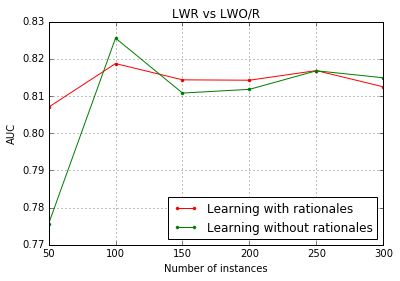

In [143]:
l = [50,100,150,200,250,300]
plt.figure()
plt.title("LWR vs LWO/R")
plt.xlabel("Number of instances")
plt.ylabel("AUC")
plt.grid()
plt.plot(l,lwr,'.-', color="r",label="Learning with rationales")
plt.plot(l,lwo_r,'.-', color="g",label="Learning without rationales")
plt.legend(loc=4)
plt.show()

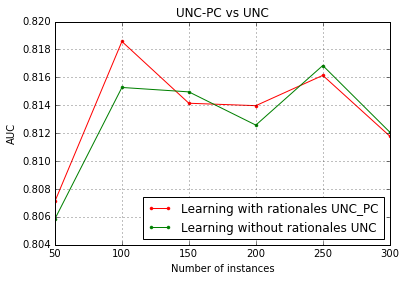

In [144]:
l = [50,100,150,200,250,300]
plt.figure()
plt.title("UNC-PC vs UNC")
plt.xlabel("Number of instances")
plt.ylabel("AUC")
plt.grid()
plt.plot(l,lwr_UNC_PC,'.-', color="r",label="Learning with rationales UNC_PC")
plt.plot(l,lwr_UNC,'.-', color="g",label="Learning without rationales UNC")
plt.legend(loc=4)
plt.show()

In [145]:
# End of Ipython Notebook